# Data science process
- Problem definition
- Data acquisition
- Data preparation and EDA (Exploratory Data Analysis)
- Feature Engineering and Feature extraction
- Model planning
- Model building
- Model Evaluation
- Model Deployment


## (1) Problem Definition
- Housing Finance company deals with home loans.
- The dataset is provided to identify the customer segments that are eligible for loan amount so that they can specifically target these customers.

## (2) Data Acquisition


**The dataset contains following 13 features information**

* Loan_ID	Unique Loan ID
* Gender	Male/ Female
* Married	Applicant married (Y/N)
* Dependents	Number of dependents
* Education	Applicant Education (Graduate/ Under Graduate)
* Self_Employed	Self employed (Y/N)
* ApplicantIncome	Applicant income
* CoapplicantIncome	Coapplicant income
* LoanAmount	Loan amount in thousands
* Loan_Amount_Term	Term of loan in months
* Credit_History	credit history meets guidelines
* Property_Area	Urban/ Semi Urban/ Rural
* Loan_Status	(Target) Loan approved (Y/N)

## (3) Data Preparation
- Data Exploration
- Data Cleaning
- Missing value treatments
- Outlier handling
- Data encoding techniques
- Feature engineering
- Challenges of high dimensionality
- Dimension reduction using principal component analysis

In [709]:
#Loading Packages
import pandas as pd 
import numpy as np      

import seaborn as sns                 
import matplotlib.pyplot as plt       
%matplotlib inline 
#pip install plotly
import plotly.express as px

import warnings  
warnings.filterwarnings("ignore")

In [710]:
data=pd.read_csv("data/loan.csv")
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


## Data Exploration

In [711]:
data.shape

(614, 13)

In [712]:
print('number of rows', data.shape[0])
print('number of columns',data.shape[1])

number of rows 614
number of columns 13


In [713]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [714]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [715]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [716]:
print('integer type data', data.select_dtypes(include='int64').shape)

integer type data (614, 1)


In [717]:
# how many columns are of integer type
print('number of columns of integer type', data.select_dtypes(include='int64').shape[1])
# how many columns are of object type
print('number of columns of object type', data.select_dtypes(include='object').shape[1])
# how many columns are of float type
print('number of columns of float type', data.select_dtypes(include='float64').shape[1])

number of columns of integer type 1
number of columns of object type 8
number of columns of float type 4


In [718]:
# Summary of numeric (int and float) data

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [719]:
# Summary of object data

data.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [720]:
# Aggregation by grouping
# Frequency

data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [721]:
# Relative Frequency

data['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [722]:
# Identify duplicate data
# data[data.duplicated()==True]
data[data.duplicated()].sum()

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

## Data Visualization

## Univariate Analysis

## Numerical Attribute Analysis :Histogram

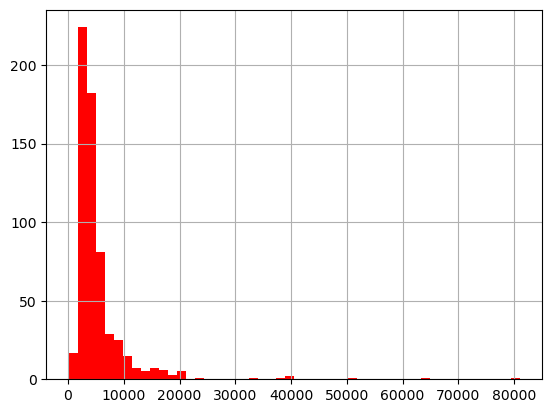

In [723]:
data['ApplicantIncome'].hist(bins=50,color='red')
plt.show()

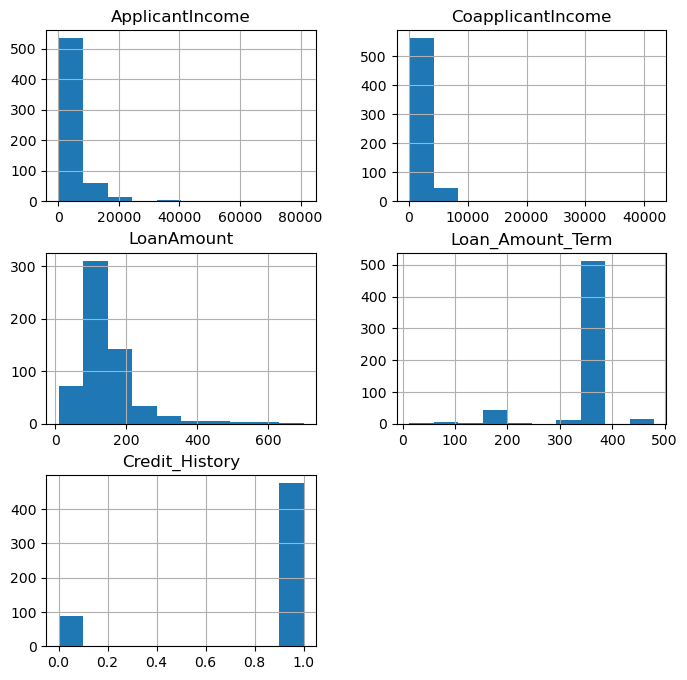

In [724]:
data.hist(figsize=(8,8))
plt.show()

<Axes: xlabel='ApplicantIncome'>

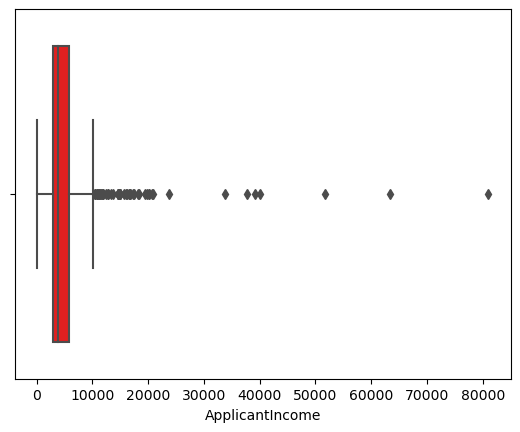

In [725]:
sns.boxplot(data=data, x='ApplicantIncome',color="red")

In [726]:
px.box(data,x='ApplicantIncome')

In [727]:
# identify the unique values
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [728]:
data.drop (['Loan_ID'],inplace=True,axis=1)
{column:list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Male', 'Female', nan],
 'Married': ['No', 'Yes', nan],
 'Dependents': ['0', '1', '2', '3+', nan],
 'Education': ['Graduate', 'Not Graduate'],
 'Self_Employed': ['No', 'Yes', nan],
 'Property_Area': ['Urban', 'Rural', 'Semiurban'],
 'Loan_Status': ['Y', 'N']}

## Bivariate Analysis using visualization

## Stacked Histogram

In [729]:
Gdr=pd.crosstab(data['Gender'],data['Loan_Status'])
Gdr

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<Axes: xlabel='Gender'>

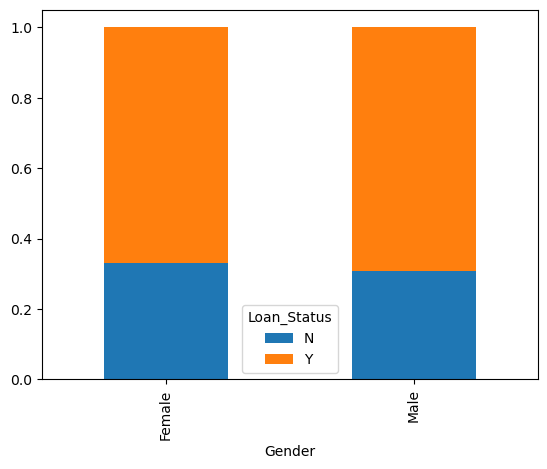

In [730]:
Gdr.div(Gdr.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [731]:
Edu=pd.crosstab(data['Education'],data['Loan_Status'])
Edu

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [732]:
140+340

480

In [733]:
140/480

0.2916666666666667

In [734]:
340/480

0.7083333333333334

In [735]:
Edu.div(Edu.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


Text(0, 0.5, 'Rel.Frequency')

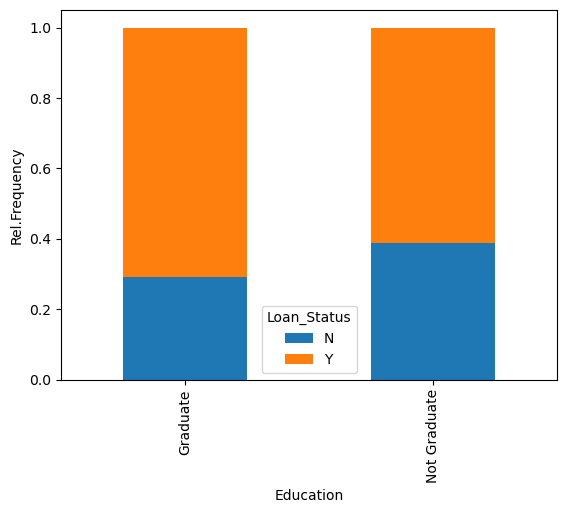

In [736]:

Edu.div(Edu.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Education")
plt.ylabel("Rel.Frequency")

In [737]:
data.groupby('Gender')['Loan_Status'].count()

Gender
Female    112
Male      489
Name: Loan_Status, dtype: int64

<Axes: xlabel='Gender'>

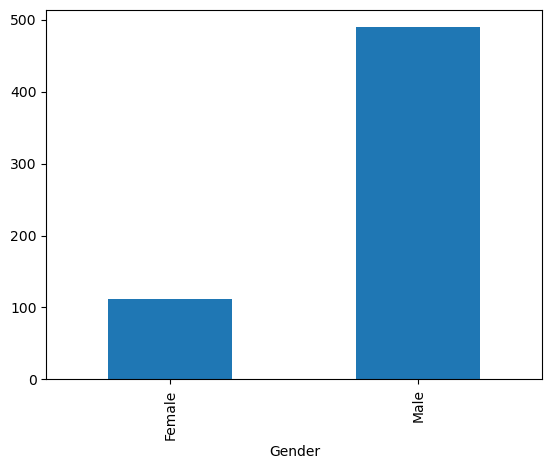

In [738]:
data.groupby('Gender')['Loan_Status'].count().plot(kind='bar')

## Data Cleaning

## Missing Value 


In [739]:
# Identify the missing values under each column
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [740]:
# Total missing values
data.isnull().sum().sum()

149

In [741]:
# % missing values
(data.isnull().sum().sum()/len(data))*100

24.267100977198698

In [742]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


## impute the missing data

In [743]:
# percentage of missing data whandling based on the domain knowledge

# <5% - remove the rows which are having missing values (Deletion)

# 5% to 10% - impute using mean, median (numeric data) or mode(non-numeric data)
# 5% to 10% - forward fill/backward fill (is used for time-series data)

# 10% to 20% - regression, KNN imputation, interpolation

# >20% - drop that column / attribute based on the relevance 
# >20% - factorization, random techniques

<Axes: >

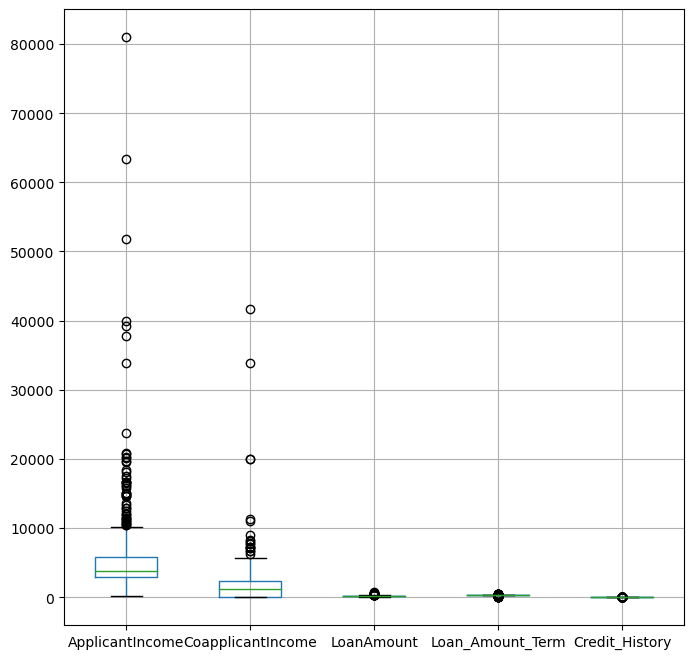

In [744]:
# Impute with mean provided outliers are not there
data.boxplot(figsize=(8,8))

In [745]:
# use median to impute the missing values for numeric attributes
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)

In [746]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [747]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [748]:
# use mode to impute the missing values for object type attributes
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [749]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [750]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [751]:
d=pd.DataFrame([10,20,30,30,10])
d.mode()[0]

0    10
1    30
Name: 0, dtype: int64

In [752]:
d=pd.DataFrame([10,20,30,30,10,np.nan,np.nan])
d

,0
0,10.0
1,20.0
2,30.0
3,30.0
4,10.0
5,NaN
6,NaN


In [753]:
d.fillna(d.mode()[0],inplace=True)
d

,0
0,10.0
1,20.0
2,30.0
3,30.0
4,10.0
5,10.0
6,10.0


In [754]:
from sklearn.impute import SimpleImputer

# Create the array
scores = np.array([15, np.nan, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9, np.nan])


# Create a SimpleImputer object with the mean strategy
imputer = SimpleImputer(strategy='median')

# # Fit and transform the imputer on the scores array
imputed_scores = imputer.fit_transform(scores.reshape(-1,1))


# # Print the imputed scores in one dimension
print(imputed_scores.flatten())

[15. 13. 18.  7. 13. 16. 11. 21.  5. 15. 10.  9. 13.]


## Outlier detection ways
- box plot or histogram
- Z-score
- IQR (Inter Quartile Range)

In [755]:
scores=np.array([15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9,-201])

In [756]:
scores

array([  15,  101,   18,    7,   13,   16,   11,   21,    5,   15,   10,
          9, -201])

<Axes: >

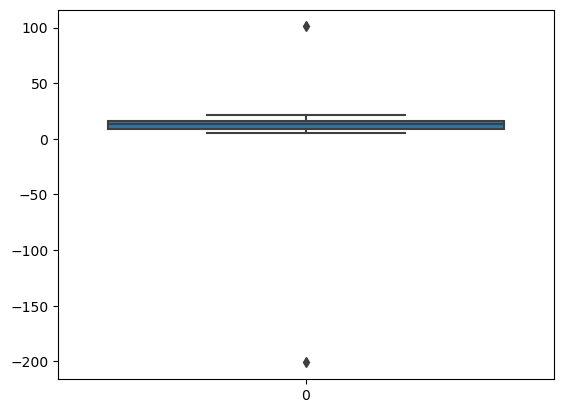

In [757]:
# Box plot
sns.boxplot(scores)

<Axes: ylabel='Count'>

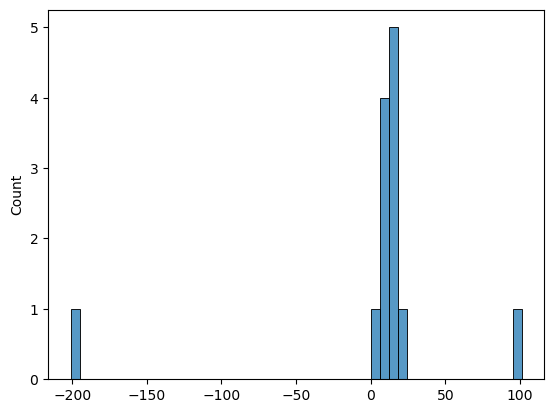

In [758]:
# histogram
sns.histplot(scores)

In [759]:
# Z-score
# Z=(x-mean)/std_dev

scores=np.array([15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9,-201])
scores=np.sort(scores)
mean=np.mean(scores)
std_dev=np.std(scores)
z_scores=(scores-mean)/std_dev
print(z_scores)

outliers=scores[np.abs(z_scores)>=1.5]
print("outliers",outliers)


[-3.21149257  0.03026284  0.06173619  0.09320955  0.10894622  0.1246829
  0.15615625  0.18762961  0.18762961  0.20336628  0.23483964  0.28204967
  1.54098381]
outliers [-201  101]


- if z-score  of a value is less than -3 or greater than +3 then the value associated with the z-score is considered as an outlier

<Axes: >

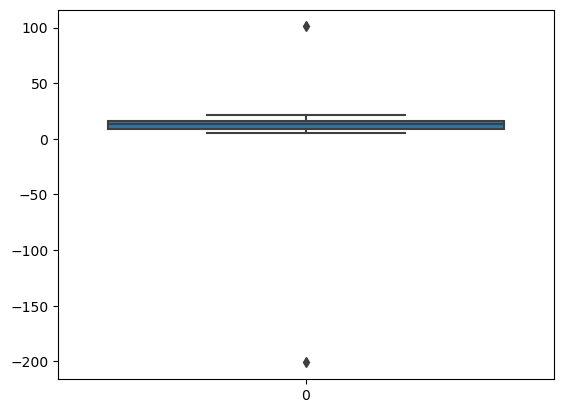

In [760]:
sns.boxplot(scores)

In [761]:
# IQR
# IQR=Q3-Q1
Q1=np.quantile(scores,0.25)
Q3=np.quantile(scores,0.75)
IQR=Q3-Q1

UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

print(Q1,Q3,LB,UB)

outliers=scores[(scores<=LB) | (scores>=UB)]
print(outliers)

9.0 16.0 -1.5 26.5
[-201  101]


In [762]:
# Handling Outliers
# Remove the outliers considering the data imbalance
# Extending the IQR 
# Mean/Median used for imputation
# use percentiles (10th , 90th) for imputing

<Axes: >

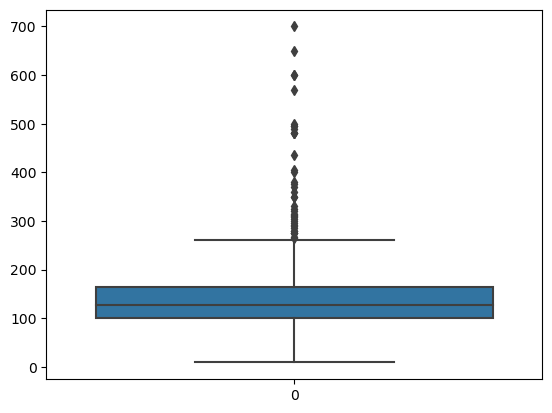

In [763]:
sns.boxplot(data=data['LoanAmount'])

In [764]:
# Remove the outliers
# IQR=Q3-Q1
Q1=np.quantile(data['LoanAmount'],0.25)
Q3=np.quantile(data['LoanAmount'],0.75)
IQR=Q3-Q1

UB=Q3+3*IQR
LB=Q1-3*IQR

#print(Q1,Q3,LB,UB)

outliers=data[(data['LoanAmount']<=LB) | (data['LoanAmount']>=UB)]
print(len(outliers))

19


In [765]:
not_outliers=data[(data['LoanAmount']>LB) & (data['LoanAmount']<UB)]
print(len(not_outliers))

595


<Axes: >

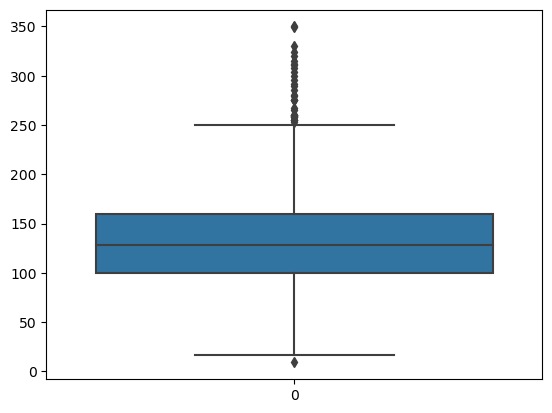

In [766]:
sns.boxplot(data=not_outliers['LoanAmount'])

## How to handle outliers

In [767]:
# Remove the outliers: if they are due to data entry error or they are not part of the data distribution
# Tranformations: log-tranform in case of skewed data use 
# Binning / discretization: grouping the data into bins

In [768]:
# Box plot 
px.box(data,x='LoanAmount')

In [769]:
fig=px.histogram(data,x='LoanAmount')
fig.show()

<Axes: xlabel='LoanAmount', ylabel='Density'>

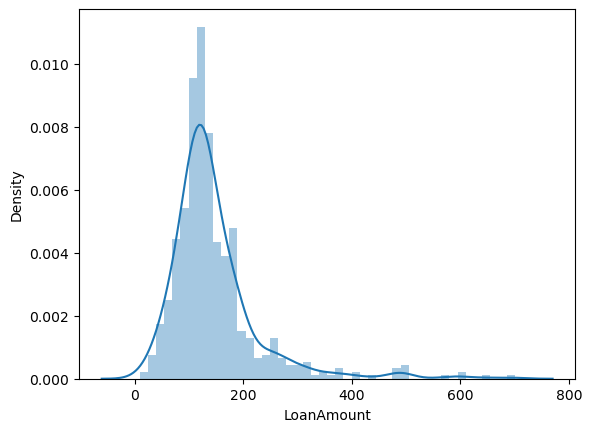

In [770]:
sns.distplot(data['LoanAmount'])

In [771]:
# Handle outliers with log tranform
data1=data
data1['LoanAmount'].head(3)

0    128.0
1    128.0
2     66.0
Name: LoanAmount, dtype: float64

In [772]:
data1['LoanAmount']=np.log(data1['LoanAmount'])
data1['LoanAmount'].head(3)

0    4.852030
1    4.852030
2    4.189655
Name: LoanAmount, dtype: float64

<Axes: xlabel='LoanAmount', ylabel='Density'>

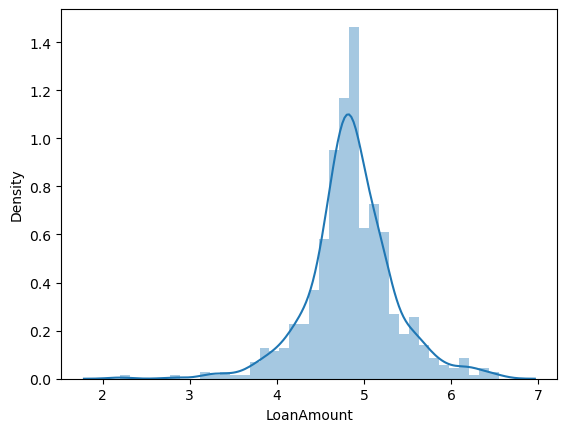

In [773]:
sns.distplot(data1['LoanAmount'])

In [774]:
# Remove the outliers
# IQR=Q3-Q1
Q1=np.quantile(data1['LoanAmount'],0.25)
Q3=np.quantile(data1['LoanAmount'],0.75)
IQR=Q3-Q1

UB=Q3+3*IQR
LB=Q1-3*IQR

#print(Q1,Q3,LB,UB)

outliers=data1[(data1['LoanAmount']<=LB) | (data1['LoanAmount']>=UB)]
print(len(outliers))

2


## Discrepancies / Inconsistencies in data

In [775]:
# Repalce 3+ with 4
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [776]:
data=data.replace(to_replace='3+',value=4)

In [777]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y


In [778]:
data['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

# Feature Engineering

- Create a new feature / attribute
- Transform the existing feature 
- Feature can be numeric, categorical

## Variable Transformation
- Categorical Variable Transformations -Encoding Techniques
- Numeric Variable Transformation - Standardization and Normalization 

## Categorical Variable Transformations -Encoding Techniques
- one-hot encoding
- count encoding
- label encoding
- ordinal encoding

## one-hot encoding 
- Each category is represented as a binary vector with 0s and a single 1.
- One-hot encoding is preferred in situations where there is no ordinal relationship between categories, and each category is treated as independent.

In [779]:
#pip install -U scikit-learn

In [780]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
df=pd.DataFrame({'colors':['red','Green','blue','Green','red']})
encd=OneHotEncoder()
encoded_data=encd.fit_transform(df[['colors']])
encoded_data=pd.DataFrame(encoded_data.toarray(),columns=encd.get_feature_names_out())
print(encoded_data)

   colors_Green  colors_blue  colors_red
0           0.0          0.0         1.0
1           1.0          0.0         0.0
2           0.0          1.0         0.0
3           1.0          0.0         0.0
4           0.0          0.0         1.0


In [781]:
# blue Green red
# 0     0     1
# 0     1     0
# 1     0     0
# 0     1     0
# 0     0     1

In [782]:
#pip install category_encoders


## Count Encoding
- is used to convert categorical variables into numerical format by assigning the frequency count of each category

In [783]:
# Count Encoding
import pandas as pd
import category_encoders as ce
df=pd.DataFrame({'colors':['red','Green','blue','Green','red']})
encd = ce.CountEncoder()
encoded_data=encd.fit_transform(df['colors'])
encoded_data=pd.DataFrame(encoded_data,columns=encd.get_feature_names_out())
print(encoded_data)

   colors
0       2
1       2
2       1
3       2
4       2


In [784]:
# color    count
# red      2
# Green    2
# blue     1
# Green    2
# red      2


## Label Encoding
- Label encoding assigns a unique integer label to each category 

In [785]:
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame({'Size': ["Small","Medium","Large","ExtraLarge"]})
df

,Size
0,Small
1,Medium
2,Large
3,ExtraLarge


In [786]:
# initialize the encoder
encd=LabelEncoder()

In [787]:
# Fit and transform the data
encd_data=encd.fit_transform(df['Size'])

In [788]:
df['Encd_data']=encd_data
print(df)

         Size  Encd_data
0       Small          3
1      Medium          2
2       Large          1
3  ExtraLarge          0


## Ordinal Encoding
- convert categorical into numerical while preserving the ordinal information

In [789]:
df1=pd.DataFrame({'FeedBack': ["Average","Good","Average","Poor","Excellent","Good","Verypoor","Good","Average","Poor","Excellent","Verypoor"]})
df1

# The scale is : VeryPoor:0, Poor:1,Average:2,Good:3,Excellent:4

,FeedBack
0,Average
1,Good
2,Average
3,Poor
4,Excellent
5,Good
6,Verypoor
7,Good
8,Average
9,Poor


In [790]:
# Define the order
order=["Verypoor","Poor","Average","Good","Excellent"]

In [791]:
# convert the categorical with specified order
df1['FeedBack_codes']=pd.Categorical(df1["FeedBack"], categories=order, ordered=True).codes
print(df1)

     FeedBack  FeedBack_codes
0     Average               2
1        Good               3
2     Average               2
3        Poor               1
4   Excellent               4
5        Good               3
6    Verypoor               0
7        Good               3
8     Average               2
9        Poor               1
10  Excellent               4
11   Verypoor               0


## Apply Encoding techniques on loan dataset 
- to convert categorical to numerical

In [792]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,Y


In [793]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [794]:
# Binary Encoding Technique using map() function
data1=data
Gender_map={'Male':0,'Female':1}                
data1['Gender'] = data1['Gender'].map(Gender_map)    
data1['Gender'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

In [795]:
data1["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [796]:
Married_map={"Yes":1,"No":0}
Education_map={"Graduate":1,"Not Graduate":0}
# Dependents_map={'0':0,'1':1,'2':2,'4':4}
Self_Employed_map={"Yes":1,"No":0}         
Property_Area_map={"Rural":0,"Urban":1,"Semiurban":2}         
Loan_Status_map={'Y':1,'N':0}   

In [797]:
data1['Married'] = data1['Married'].map(Married_map) 
data1['Education'] = data1['Education'].map(Education_map) 
# data1['Dependents'] = data1['Dependents'].map(Dependents_map) 
data1['Self_Employed'] = data1['Self_Employed'].map(Self_Employed_map) 
data1['Property_Area'] = data1['Property_Area'].map(Property_Area_map) 
data1['Loan_Status'] = data1['Loan_Status'].map(Loan_Status_map) 

In [798]:
data1['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [799]:
data1.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,4.852030,360.0,1.0,1,1
1,0,1,1,1,0,4583,1508.0,4.852030,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,4.189655,360.0,1.0,1,1
3,0,1,0,0,0,2583,2358.0,4.787492,360.0,1.0,1,1
4,0,0,0,1,0,6000,0.0,4.948760,360.0,1.0,1,1


In [800]:
# Drop the column
data1.drop(['Married'],inplace=True, axis=1)
data1.head(4)

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,5849,0.0,4.852030,360.0,1.0,1,1
1,0,1,1,0,4583,1508.0,4.852030,360.0,1.0,0,0
2,0,0,1,1,3000,0.0,4.189655,360.0,1.0,1,1
3,0,0,0,0,2583,2358.0,4.787492,360.0,1.0,1,1


## Bivaraite Analysis 

- Examine the realtionship between two variables in the dataset 
- The variables are independent and dependent (target Vaiable)

## Correlation

In [801]:
corrs = data1.corr()
corrs

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.045364,0.000525,-0.058809,-0.082912,-0.143388,0.074030,-0.009170,0.109521,-0.017987
Education,0.045364,1.000000,0.010383,0.140760,0.062290,0.145885,0.073928,0.073658,0.066740,0.085884
Self_Employed,0.000525,0.010383,1.000000,0.127180,-0.016100,0.109677,-0.033739,-0.001550,-0.007124,-0.003700
ApplicantIncome,-0.058809,0.140760,0.127180,1.000000,-0.116605,0.435392,-0.046531,-0.018615,-0.017321,-0.004710
CoapplicantIncome,-0.082912,0.062290,-0.016100,-0.116605,1.000000,0.206330,-0.059383,0.011134,-0.019087,-0.059187
LoanAmount,-0.143388,0.145885,0.109677,0.435392,0.206330,1.000000,0.085353,-0.018547,-0.039581,-0.037997
Loan_Amount_Term,0.074030,0.073928,-0.033739,-0.046531,-0.059383,0.085353,1.000000,-0.004705,0.016086,-0.022549
Credit_History,-0.009170,0.073658,-0.001550,-0.018615,0.011134,-0.018547,-0.004705,1.000000,0.033102,0.540556
Property_Area,0.109521,0.066740,-0.007124,-0.017321,-0.019087,-0.039581,0.016086,0.033102,1.000000,0.137545
Loan_Status,-0.017987,0.085884,-0.003700,-0.004710,-0.059187,-0.037997,-0.022549,0.540556,0.137545,1.000000


<Axes: >

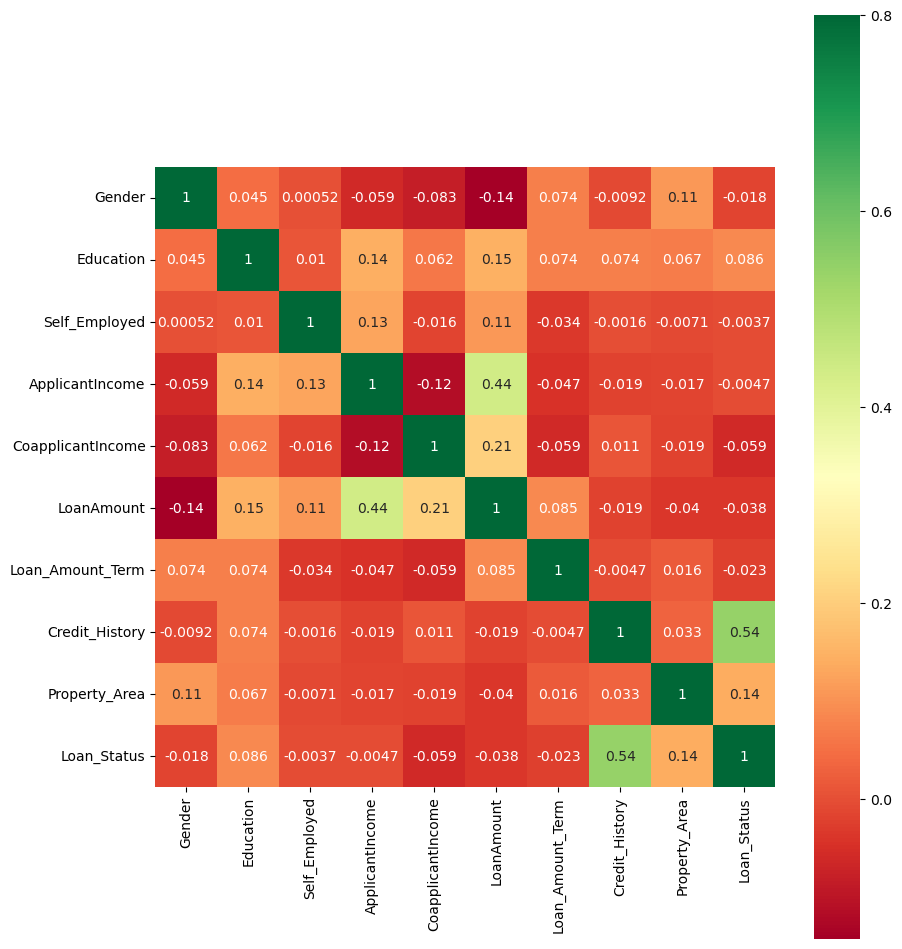

In [802]:
# Heatmap is used to provide the association among the variables in the dataset
matrix = data1.corr()
plt.subplots(figsize=(10,12))
sns.heatmap(matrix,vmax=.8,square=True,cmap='RdYlGn', annot = True)


# Model Planning

### Loan dataset is having a target column hence suprevised learning algorithm can be used.
### Regression
### Classfication

### Regression: target variable is numeric (Linear)
### Classification: target variable  is categorical (non linear)    


### Regression
- Linear : y=mx+c y=beta0+beta1*x
    Multiple y=beta0+beta1*x1+beta2*x2
- Polynomial y=beta0+beta1*x+beta2*x^2
- Lasso
- Ridge   

# Construct the Linear Regression Model 
- import the libraries
- Load the dataset
- Pre-Process the data
- Split the dataset into train and test
- Create the Linear Regression Model
- Evaluate the Model

In [803]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [804]:
# load the dataset
data=pd.read_csv("data/loan.csv")
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [805]:
# Preprocessed data 
# refer the previous work in the same jupyter notebook to obtain the preprocessed data
data1.head(3)

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,5849,0.0,4.852030,360.0,1.0,1,1
1,0,1,1,0,4583,1508.0,4.852030,360.0,1.0,0,0
2,0,0,1,1,3000,0.0,4.189655,360.0,1.0,1,1


In [806]:
# Create train and test datasets
from sklearn.model_selection import train_test_split

In [807]:
# split the data and label
X = data1.drop(columns=['Loan_Status'],axis=1)   # independent variable / predictor variable / input varaible
Y = data1['Loan_Status']        # dependent variable / response variable / output variable /target variable

In [808]:
X.head(3)

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,1,0,5849,0.0,4.852030,360.0,1.0,1
1,0,1,1,0,4583,1508.0,4.852030,360.0,1.0,0
2,0,0,1,1,3000,0.0,4.189655,360.0,1.0,1


In [809]:
Y.head(3)

0    1
1    0
2    1
Name: Loan_Status, dtype: int64

In [810]:
# Simple Linear regression Equation (with one dependent variable)
# y=b0+b1*x+e
# y=c+mx

# Multiple Linear regression Equation (with more than one dependent variable)
# y  = b0 + (b1*x1) + (b2*x2) + (b3 *x3)+.......+(b10*x10)

In [811]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)
# X_train: training data set 70% of the original data
# Y_train: target variable corresponding to the training data set
# X_test: testing data set 30% of the original data
# Y_test: target variable corresponding to the test data set 
# stratify is used with respect to the target variable (loan_status(0,1)) to maintain the proportion of 
# each value of the target in train as well as test dataset same as the orignal dataset
print(data1['Loan_Status'].value_counts(normalize=True))
print(Y_train.value_counts(normalize=True))

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64
1    0.687646
0    0.312354
Name: Loan_Status, dtype: float64


In [812]:
# # without stratify
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
# # stratify is used with respect to the target variable (loan_status(0,1))
# print(data1['Loan_Status'].value_counts(normalize=True))
# print(Y_train.value_counts(normalize=True))
# print(Y_test.value_counts(normalize=True))

In [813]:
print(X.shape,X_test.shape,X_train.shape)

(614, 10) (185, 10) (429, 10)


In [814]:
# Build Linear model and fit the regression Line using 'OLS'
# import scipy.stats as st 
# import statsmodels.api as sm
# Add a constant to get the intercept
# X_train1=sm.add_constant(X_train)
# X_train1.head(10)

In [815]:
data1.isnull().sum()

Gender               0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [816]:
data1.head(3)

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,5849,0.0,4.852030,360.0,1.0,1,1
1,0,1,1,0,4583,1508.0,4.852030,360.0,1.0,0,0
2,0,0,1,1,3000,0.0,4.189655,360.0,1.0,1,1


In [817]:
model=LinearRegression() # creates an instance 
model.fit(X_train,Y_train) # fit the model to the data

LinearRegression()

In [818]:
# model output
# obtain the intercept of the regression line equation
print(model.intercept_)

-0.07253728421735228


In [819]:
# obtain the sploe of the regression line equation
print(model.coef_)

[-2.38253552e-02  3.02072302e-02  8.31220036e-02 -3.78932294e-02
 -9.90161945e-07 -8.74649605e-06  1.49732988e-02 -6.16877918e-05
  6.65104071e-01  6.26577999e-02]


In [820]:
# y  = b0 + (b1*x1) + (b2*x2) + (b3 *x3)+.......+(b10*x10)
# Loan_Status = -0.033537750976353586 + (-0.00172)*Gender + (0.0318)*Dependents + ...........+(0.709)*Credit_History + (0.0741)* Property_Area

In [821]:
# -1.71879947e-03 = -0.00172
# 3.17903986e-02 = 0.0318
# .
# .
# .
# .
# .
# .
# 7.09384958e-01 = 0.709
# 7.41414849e-02 = 0.0741

In [822]:
# Use the model for prediction
# using the test data set for prediction
Loan_Status_Predict=model.predict(X_test)
Loan_Status_Predict=[round(i,2) for i in Loan_Status_Predict]
print(len(Loan_Status_Predict))
print(Loan_Status_Predict)

185
[0.83, 0.75, 0.85, 0.79, 0.7, 0.84, 0.96, 0.93, 0.71, 0.84, 0.73, 0.79, 0.09, 0.74, 0.82, 0.84, 0.83, 0.82, 0.79, 0.74, 0.74, 0.74, 0.14, 0.76, 0.65, 0.71, 0.7, 0.07, 0.78, 0.24, 0.12, 0.77, 0.84, 0.74, 0.49, 0.7, 0.23, 0.76, 0.05, 0.02, 0.7, 0.81, 0.83, 0.78, 0.71, 0.91, 0.83, 0.72, 0.78, 0.85, 0.64, 0.62, 0.8, 0.14, 0.18, 0.82, 0.16, 0.83, 0.82, 0.73, 0.84, 0.7, 0.72, 0.08, 0.74, 0.72, 0.84, 0.77, 0.69, 0.86, 0.75, 0.64, 0.08, 0.01, 0.81, 0.75, 0.72, 0.17, 0.91, 0.2, 0.72, 0.83, 0.58, 0.09, 0.82, 0.85, 0.71, 0.81, 0.62, 0.69, 0.89, 0.8, 0.82, 0.77, 0.78, 0.76, 0.97, 0.7, -0.05, 0.86, 0.83, 0.64, 0.9, 0.79, 0.11, 0.89, 0.73, 0.06, 0.2, 0.29, 0.25, 0.01, 0.12, 0.9, 0.01, 0.75, 0.81, 0.8, 0.88, 0.16, 0.83, 0.82, 0.72, 0.88, 0.75, 0.83, 0.73, 0.76, 0.79, 0.73, 0.69, 0.72, 0.76, 0.71, 0.71, 0.76, 0.1, 0.75, 0.74, 0.75, 0.83, 0.16, 0.78, 0.7, 0.8, 0.69, 0.05, 0.76, 0.62, 0.65, 0.76, 0.83, 0.77, 0.65, 0.76, 0.81, 0.76, 0.14, 0.9, 0.83, 0.79, 0.79, 0.83, 0.85, 0.84, 0.15, 0.61, 0.87, 0.9

In [823]:
Act_Pred=pd.DataFrame({'Actual':Y_test,'Predicted':Loan_Status_Predict})
Act_Pred

,Actual,Predicted
433,1,0.83
415,1,0.75
144,1,0.85
522,1,0.79
493,1,0.70
...,...,...
86,1,0.80
500,1,0.66
381,1,0.82
219,1,0.86


## Model Evaluation Metrics

### Error : difference between the Actual and predicted values
    
#### MSE :Mean Squared Error
* Measure the average(mean) squared difference between the predicted and the actual values

#### MAE: Mean Absolute Error
* Measure the average(mean) absolute difference between the predicted and the actual values

#### RMSE: Root Mean Squred Error
* Square root of MSE

#### MAPE: Mean absolute percentage Error

#### R-squared (R^2): 
* R-square or the coefficient of determination is a metric used to evaluate the regression model.
* it measures the independent variable impact on the depenedent variable
* ranges between 0 to 1
* R^2=0 the model does not explain any of the variance in the dependent variable. Poor fit.
* R^2=1 Excellent model. All the variance in the dependent variable is explained.

#### R^2=1-[(sum of the squared differences between the actual dependent values and predicted values)/(Sum of squared differences between the actual dependent values and the mean of the dependent values)

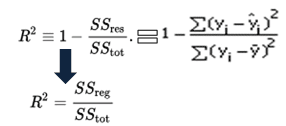

In [825]:
from sklearn import metrics

In [826]:
print(" The R Squared Score ", model.score(X_test,Y_test))
# calculating the R2 score using the model on the X_test and comparing the  predictions with the Y_test

 The R Squared Score  0.3980165355580265


In [827]:
print(" The R Squared Score ", model.score(X,Y))

 The R Squared Score  0.308391904695857


In [828]:
# MAE
MAE=metrics.mean_absolute_error(Y_test,Loan_Status_Predict)
print(MAE)

0.2873513513513513


In [829]:
# MSE
MSE=metrics.mean_squared_error(Y_test,Loan_Status_Predict)
print(MSE)

0.12959027027027026


In [830]:
# RMSE
RMSE=np.sqrt(metrics.mean_squared_error(Y_test,Loan_Status_Predict))
print(RMSE)

0.35998648623284496


In [831]:
# Act_Pred['Actual']
# Act_Pred['Predicted']
# print(abs((Act_Pred['Actual']-Act_Pred['Predicted'])))
# print(abs((Act_Pred['Actual']-Act_Pred['Predicted'])/(Act_Pred['Actual'])))
# MAPE=abs((Act_Pred['Actual']-Act_Pred['Predicted'])/(Act_Pred['Actual']))*100
# MAPE.mean()
# MAPE
# MAPE=np.mean(abs((Act_Pred['Actual']-Act_Pred['Predicted'])/(Act_Pred['Actual']))*100)
# print(MAPE)

In [832]:
# Adjusted R square
# R2 value
# number of attributes / variables
# number of independent variables used in the model

In [833]:
import statsmodels.formula.api as smf